### Getting Parse Images

In [12]:
from PIL import Image, ImageDraw

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path as osp

In [16]:
parse = Image.open("./datasets/test/image-parse/00891_00.png")

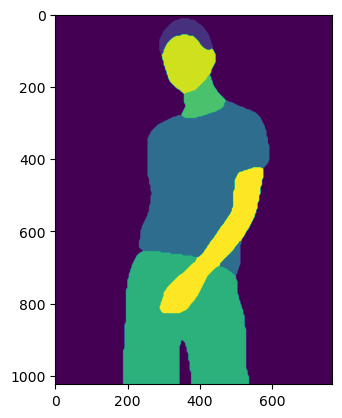

In [18]:
parse_array = np.array(parse)
plt.imshow(parse_array)

#### To Get Segments - 

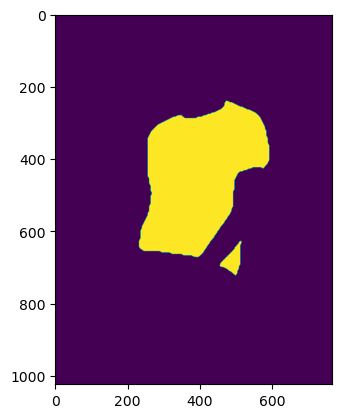

In [19]:
 plt.imshow(parse_array == 5)

In [20]:
df = pd.DataFrame(parse_array)

In [21]:
df.to_excel("array.xlsx")

In [22]:
np.unique(parse_array)

array([ 0,  2,  5,  9, 10, 13, 14], dtype=uint8)

In [23]:
#Upper Mask
parse_upper = ((parse_array == 5).astype(np.float32) +
                       (parse_array == 6).astype(np.float32) +
                       (parse_array == 7).astype(np.float32))

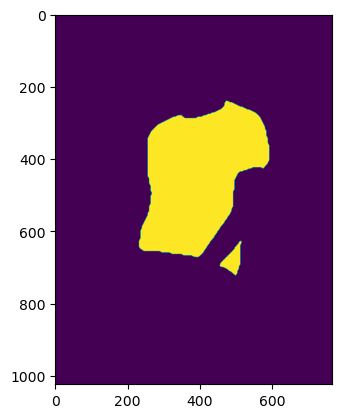

In [24]:
plt.imshow(parse_upper)

#### Understanding Pose Info for Arms mask

In [29]:
import json
with open(osp.join("./datasets/test/openpose-json/00891_00_keypoints.json"), 'r') as f:
    pose_label = json.load(f)
    pose_data = pose_label['people'][0]['pose_keypoints_2d']
    pose_data = np.array(pose_data)
    pose_data = pose_data.reshape((-1, 3))[:, :2]

In [30]:
pose_data

array([[ 349.091,  147.821],
       [ 400.138,  317.836],
       [ 292.373,  329.363],
       [ 303.693,  513.417],
       [   0.   ,    0.   ],
       [ 513.438,  303.726],
       [ 527.623,  547.373],
       [ 394.255,  720.279],
       [ 351.821,  711.821],
       [ 272.552,  697.645],
       [ 266.87 ,  995.149],
       [   0.   ,    0.   ],
       [ 428.392,  723.103],
       [ 473.774, 1000.79 ],
       [   0.   ,    0.   ],
       [ 326.226,  125.155],
       [ 374.579,  113.822],
       [ 306.453,  147.828],
       [ 425.595,  122.235],
       [   0.   ,    0.   ],
       [   0.   ,    0.   ],
       [   0.   ,    0.   ],
       [   0.   ,    0.   ],
       [   0.   ,    0.   ],
       [   0.   ,    0.   ]])

In [31]:
pose_data.shape

(25, 2)

In [32]:
pose_data[2, 1]

329.363

In [33]:
r = 10
k = 0
dictionary = dict()
agnostic = parse.copy()
temp_agnostic = parse.copy()
for parse_id, pose_ids in [(14, [2, 5, 6, 7]), (15, [5, 2, 3, 4])]:
    mask_arm = Image.new('L', (768, 1024), 'black')
    mask_arm_draw = ImageDraw.Draw(mask_arm)
    i_prev = pose_ids[0]
    for i in pose_ids[1:]:
        if (pose_data[i_prev, 0] == 0.0 and pose_data[i_prev, 1] == 0.0) or (pose_data[i, 0] == 0.0 and pose_data[i, 1] == 0.0):
            continue
        mask_arm_draw.line([tuple(pose_data[j]) for j in [i_prev, i]], 'white', width=r*10)
        pointx, pointy = pose_data[i]
        radius = r*4 if i == pose_ids[-1] else r*15
        mask_arm_draw.ellipse((pointx-radius, pointy-radius, pointx+radius, pointy+radius), 'white', 'white')
        i_prev = i
        temp_arm = (np.array(mask_arm) / 255) * (parse_array == parse_id).astype(np.float32)
        temp_agnostic.paste(0, None, Image.fromarray(np.uint8(temp_arm * 255), 'L'))
        dictionary[k] = temp_agnostic
        k += 1
    parse_arm = (np.array(mask_arm) / 255) * (parse_array == parse_id).astype(np.float32)
    agnostic.paste(0, None, Image.fromarray(np.uint8(parse_arm * 255), 'L'))

In [34]:
dictionary[0] == agnostic

True

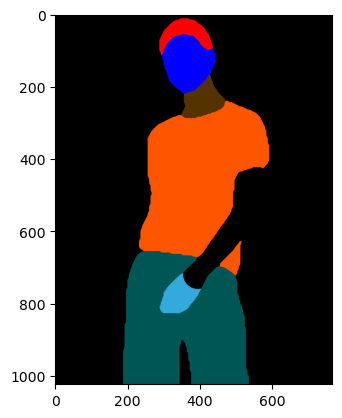

In [35]:
plt.imshow(agnostic)

We can see till wrist, mask is created above

In [36]:
parse_neck = (parse_array == 10).astype(np.float32)
agnostic.paste(0, None, Image.fromarray(np.uint8(parse_upper * 255), 'L'))
agnostic.paste(0, None, Image.fromarray(np.uint8(parse_neck * 255), 'L'))

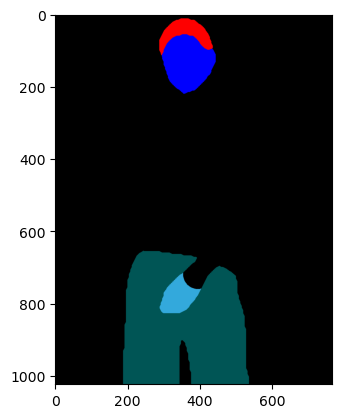

In [37]:
plt.imshow(agnostic)

Removed the Upper Mask

### Understanding Clothing & Clothing Mask

In [1]:
from PIL import Image, ImageDraw

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
c = Image.open("./datasets/test/cloth/01260_00.jpg")

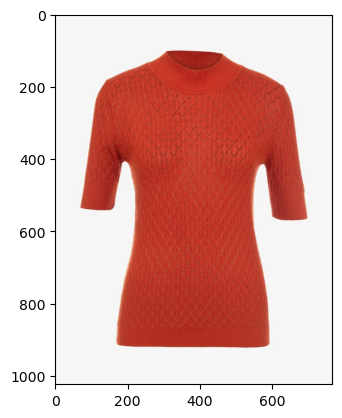

In [4]:
plt.imshow(c)

In [5]:
cm = Image.open("./datasets/test/cloth-mask/01260_00.jpg")

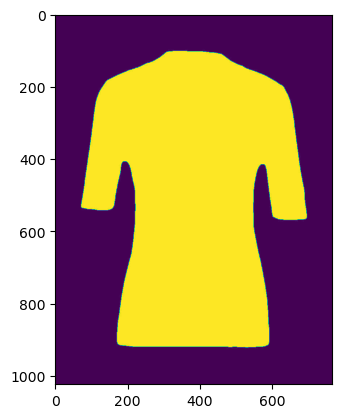

In [6]:
plt.imshow(cm)

In [7]:
c_array = np.array(c)
cm_array = np.array(cm)

In [10]:
c_masked = c_array[:,:,0] * cm_array

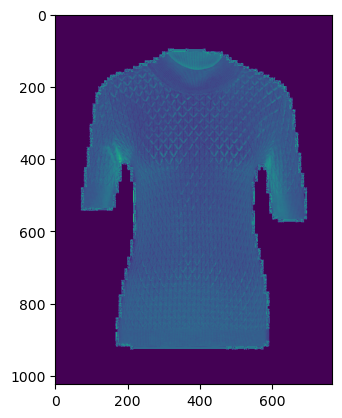

In [11]:
plt.imshow(c_masked)